### Modal SNA MAP473D, Ecole Polytechnique, 2019-20

***
**Soumission du TP pour évaluation:** 
- Remplir ce notebook et déposer sur le moodle le fichier notebook ".ipynb" ainsi qu'une sauvegarde (export) au format ".html".
- Les réponses aux questions théoriques peuvent soit être saisies (en latex) dans le notebook; soit être rendues sur feuille libre avant 17h45 aux enseignants. 
- Les dépôts sur le moodle doivent être faits avant le vendredi 6 mars, 20h. 
***

**Noms du binôme:** _A REMPLIR_

In [1]:
import numpy as np
import scipy.stats as stats

# TP3 - Echantillonnage d’importance, changements de probabilités gaussiens

$\def\R{\mathbb{R}}$
$\def\P{\mathbb{P}}$
$\def\mc{\mathcal}$
$\def\E{\mathbb{E}}$

## Partie 1. Rappel de cours : changements de probabilités, échantillonnage préférentiel et grandes déviations
Soit $X$ une v.a. à valeur dans $\R^d$, définie sur un espace de probabilité $(\Omega, \mc{F}, \P)$. On notera $\E$ l'espérance associée à la probabilité $\P$.

$\def\R{\mathbb{R}}$
$\def\P{\mathbb{P}}$
$\def\Q{\mathbb{Q}}$
$\def\mc{\mathcal}$
$\def\E{\mathbb{E}}$


### 1.1 Principe général du changement de probabilité
Soit $L:\R^d \to \R^*_+$ une fonction mesurable telle que $$\E[L(X)]=1.$$

Notons $\Q$ la loi de probabilité sur $(\Omega, \mc{F})$, de densité $L(X)$ par rapport à $\P$, et $\E_\Q$ l'espérance associée. Par définition de $\Q$, pour toute fonction $g: \R^d \to \R$ mesurable bornée, on a
<a id='eq:Principe:IS'></a>
$$ \tag{1}
    \E[g(X)]=\E \left[ \frac{g(X)}{L(X)} \, L(X) \right]=\E_{\mathbb{Q}}\left[ \frac{g(X)}{L(X)} \right].
$$

$\newcommand{\eqdef}{:=}$
$\def\R{\mathbb{R}}$
$\def\P{\mathbb{P}}$
$\def\Q{\mathbb{Q}}$
$\def\mc{\mathcal}$
$\def\E{\mathbb{E}}$
$\def\Lth{L_\theta}$
$\def\Pth{\mathbb{P}_\theta}$
$\def\Eth{\mathbb{E}_\theta}$
$\def\Vth{\mathrm{Var}_\theta}$

### 1.2 Changements de probabilité inspirés par les grandes déviations (cas $d=1$)<a id='sec:12'></a>
On définit l'ensemble convexe
$$ 
    \mc{D} \eqdef \{ \theta \in \R~:  \E\!\left[e^{\theta X} \right]<\infty \}
$$  
et la fonction $\psi: \mc{D} \to \R$ dite _fonction génératrice des cumulants_ de $X$, par 
$$
    \psi(\theta) \eqdef \log \E\!\left[ e^{\theta X} \right].
$$
On fait l'hypothèse que la loi de $X$ sous $\P$ est telle que $\mc{D}$ est non vide. Pour tout $\theta \in \mc{D}$, on définit la fonction mesurable  sur $\R$
$$
    \Lth(x) \eqdef \exp\left(\theta x - \psi(\theta)\right), \qquad x \in \R.
$$
Puisque $\E[\Lth(X)] =1$, on peut définir la loi $\Pth$ de densité $\Lth(X)$ par rapport à $\P$, de sorte que la famille de lois $\{\Pth, \theta \in \mc{D} \}$ donne des exemples de changements de probabilité $\P \to \Pth$. Lorsque $\theta = 0$, $\P$ et $\Pth$ coïncident puisque $L_0(x) =1$. Dans la suite, on utilisera les notations $\Eth$ et $\Vth$ plutôt que $\E_{\Pth}$ et $\mathrm{Var}_{\Pth}$ respectivement.

$\newcommand{\eqdef}{:=}$
$\def\R{\mathbb{R}}$
$\def\P{\mathbb{P}}$
$\def\Q{\mathbb{Q}}$
$\def\mc{\mathcal}$
$\def\E{\mathbb{E}}$
$\def\Lth{L_\theta}$
$\def\Pth{\mathbb{P}_\theta}$
$\def\Eth{\mathbb{E}_\theta}$
$\def\Vth{\mathrm{Var}_\theta}$
$\def\Var{\mathrm{Var}}$

On peut montrer que pour tout $\theta$ dans l'intérieur de $\mc{D}$, l'espérance et la variance de $X$ sous $\Pth$ sont liées aux dérivées successives de $\psi$ (voir par exemple le Corollaire 7.2  dans __[Information and Exponential Families](https://onlinelibrary.wiley.com/doi/book/10.1002/9781118857281)__) 
<a id='eq_esp_var2'></a>
$$\tag{2}
    \Eth[X]=\psi'(\theta),\qquad \qquad 
    \Vth(X)=\psi''(\theta);
$$
et en particulier, lorsque $\theta = 0$ est dans l'intérieur de $\mc{D}$,
$$ 
    \E[X]=\psi'(0),\qquad \qquad 
    \Var(X)=\psi''(0).
$$

Le succès de cette technique de changement de loi dépend de la capacité à identifier la loi de $X$ sous $\Pth$ et à faire des tirages i.i.d. sous cette loi.  Par exemple, nous montrerons en section 3.1 que si $X\sim \mc{N}(0,1)$ sous $\P$, alors $X\sim \mc{N}(\theta,1)$ sous $\Pth$. La transformation de Esscher donnera des formules du même type, lorsque sous $\P$, $X$ est un processus de Poisson composé.

$\newcommand{\eqdef}{:=}$
$\def\R{\mathbb{R}}$
$\def\P{\mathbb{P}}$
$\def\Q{\mathbb{Q}}$
$\def\mc{\mathcal}$
$\def\E{\mathbb{E}}$
$\def\Lth{L_\theta}$
$\def\Pth{\mathbb{P}_\theta}$
$\def\Eth{\mathbb{E}_\theta}$
$\def\Vth{\mathrm{Var}_\theta}$
$\def\one{1}$

### 1.3 Application à l'approximation Monte Carlo de la fonction de survie
Supposons que l'objectif soit d'approcher la quantité $\P[X>a]$ par une méthode de Monte Carlo. La méthode de Monte Carlo naïve consiste en l'approximation
<a id='eq:MC:naif'></a>
$$ \tag{3}
    \P(X>a) \simeq \frac{1}{n} \sum_{k=1}^n \one_{X_k>a} \quad 
    \text{avec $\{X_k, k \geq 1 \}$, indépendantes de même loi que $X$ sous $\P$.}
$$

Néanmoins, pour la loi $\Q$ de densité $L(X)$ par rapport à $\P$, on a aussi la relation (relire l'équation [(1)](#eq:Principe:IS) avec la fonction $g(x) = \one_{]a, +\infty[}(x)$)
$$
    \P(X>a) = \E_\Q\left[ L(X)^{-1} \, \one_{X>a} \right].
$$ 
On déduit de cette égalité une autre approximation
<a id='eq:MC:loiQ'></a>
$$ \tag{4}
    \P(X>a) \simeq \frac{1}{n} \sum_{k=1}^n \frac{1}{L(Y_k)}\one_{Y_k>a} \quad 
    \text{avec $\{Y_k, k \geq 1 \}$, indépendantes de même loi que $X$ sous $\Q$.}
$$


Dans le cas particulier où $\Q$ est de la forme $\Pth$, l'approximation $(4)$ devient
<a id='eq:MC:Ptheta'></a>
$$ \tag{5}
    \P(X>a) \simeq \frac{1}{n} \sum_{k=1}^n \exp\left( \psi(\theta) - \theta \, Y_k \right) \, \one_{Y_k>a}, \qquad
    \text{$\{Y_k, k \geq 1 \}$ indépendantes de même loi que $X$ sous $\Pth$;}
$$
la difficulté pour l'utilisateur est de choisir la valeur $\theta \in \mc{D}$ la plus "efficace".  La relation [(2)](#eq_esp_var2) suggère de choisir $\theta$ égal à la solution de $\psi'(\theta) = a$ (valeur que nous noterons $\theta_a$), puisqu'avec ce choix, sous $\P_{\theta_a}$, la loi de $X$ est centrée en $a$. Ce n'est pas nécessairement le choix optimal - selon un critère d'optimalité basé sur la réduction de variance (voir section 3.1) - mais cela donne un échantillonneur Monte Carlo plus efficace que l'échantillonneur Monte Carlo naïf. 

$\newcommand{\eqdef}{:=}$
$\def\R{\mathbb{R}}$
$\def\P{\mathbb{P}}$
$\def\Q{\mathbb{Q}}$
$\def\mc{\mathcal}$
$\def\E{\mathbb{E}}$
$\def\Lth{L_\theta}$
$\def\Pth{\mathbb{P}_\theta}$
$\def\Eth{\mathbb{E}_\theta}$
$\def\Vth{\mathrm{Var}_\theta}$

## Partie 2. Echantillonnage d'importance pour des v.a. de Bernoulli
Les v.a. sont définies sur $(\Omega, \mathcal{A}, \P)$.

$\newcommand{\eqdef}{:=}$
$\def\R{\mathbb{R}}$
$\def\P{\mathbb{P}}$
$\def\Q{\mathbb{Q}}$
$\def\mc{\mathcal}$
$\def\E{\mathbb{E}}$
$\def\Lth{L_\theta}$
$\def\Pth{\mathbb{P}_\theta}$
$\def\Eth{\mathbb{E}_\theta}$
$\def\Vth{\mathrm{Var}_\theta}$

#### Question 1:
Soient $X_1, \cdots, X_n$ des v.a. indépendantes de loi de Bernoulli $B(p_1), \ldots, B(p_n)$; et $Z_1, \ldots, Z_n$ des v.a. indépendantes de lois de Bernoulli $B(q_1), \ldots, B(q_n)$.
Montrer que pour toute fonction $g:\{0,1\}^n \to\mathbb R$ mesurable bornée, on a
\begin{eqnarray*} 
  \E \left[ g(X_1, \ldots, X_n) \right] &=& \E \left[ g(Z_1, \ldots, Z_n) \, \prod_{i=1}^n \left(\one_{Z_i=0}\frac{1-p_i}{1-q_i}+1_{Z_i=1}\frac{p_i}{q_i}\right) \right]
  \\
                                        &=& \left( \prod_{i=1}^n\frac{1-p_i}{1-q_i} \right) \  \E\left[ g(Z_1, \ldots,Z_n) \ \prod_{i=1}^n\left(\frac{p_i(1-q_i)}{q_i(1-p_i)}\right)^{Z_i} \right]
\end{eqnarray*}

##### _Réponse:_

$\newcommand{\eqdef}{:=}$
$\def\R{\mathbb{R}}$
$\def\P{\mathbb{P}}$
$\def\Q{\mathbb{Q}}$
$\def\mc{\mathcal}$
$\def\E{\mathbb{E}}$
$\def\Lth{L_\theta}$
$\def\Pth{\mathbb{P}_\theta}$
$\def\Eth{\mathbb{E}_\theta}$
$\def\Vth{\mathrm{Var}_\theta}$

***
#### Question 2:
Soit $n\ge 1$, $p,q\in ]0,1[$; et $S,S'$ deux v.a. respectivement de loi binomiale $\operatorname{Binom}(n,p)$ et de loi binomiale $\operatorname{Binom}(n,q)$. Déduire de la question précédente que pour toute fonction $f:\{0, \ldots, n\} \to \R$, on a
$$
    \E \left[ f(S) \right] 
    = \E \left[ f(S')\left(\frac{p}{q}\right)^{S'}\left(\frac{1-p}{1-q}\right)^{n-S'} \right] 
    = \left(\frac{1-p}{1-q}\right)^n \E\left[f(S')\left(\frac{p(1-q)}{q(1-p)}\right)^{S'} \right].
$$

##### _Réponse:_

$\newcommand{\eqdef}{:=}$
$\def\R{\mathbb{R}}$
$\def\P{\mathbb{P}}$
$\def\Q{\mathbb{Q}}$
$\def\mc{\mathcal}$
$\def\E{\mathbb{E}}$
$\def\Lth{L_\theta}$
$\def\Pth{\mathbb{P}_\theta}$
$\def\Eth{\mathbb{E}_\theta}$
$\def\Vth{\mathrm{Var}_\theta}$

***
#### Question 3:
Pour $S$ de loi binomiale $\operatorname{Binom}(n,p)$ et $x \in ]0,p[$, estimer $\P(S \le nx)$ des trois façons suivantes:
- en utilisant la fonction de calcul exact de cette probabilité `scipy.stats.binom.cdf`,
- par un Monte Carlo standard en simulant $N$ copies de $S$ avec la fonction `np.random.binomial` ou `scipy.stats.binom.rvs`,
- en utilisant la question 2 et en simulant $N$ copies de $S'$.

Dans les deux derniers cas, on donnera un intervalle de confiance asymptotique de probabilité de couverture $0.95$.

On pourra choisir par exemple $n=300$, $p=0.25$, $x=0.005$, $q=x$ et $N=10^6$. 

$\newcommand{\eqdef}{:=}$
$\def\R{\mathbb{R}}$
$\def\P{\mathbb{P}}$
$\def\Q{\mathbb{Q}}$
$\def\mc{\mathcal}$
$\def\E{\mathbb{E}}$
$\def\Lth{L_\theta}$
$\def\Pth{\mathbb{P}_\theta}$
$\def\Eth{\mathbb{E}_\theta}$
$\def\Vth{\mathrm{Var}_\theta}$

## Partie 3. Changement de probabilité dans un modèle gaussien
Dans cette section, $X \sim \mathcal{N}(0,1)$ sous $\P$.  Nous cherchons à calculer $\P(X>a)$ puis $\P(|X|>a)$ pour des valeurs assez élevées de $a$ de sorte que l'événement puisse être qualifié de rare (bien entendu, ces deux probabilités sont liées par la relation $\P(|X|>a)=2\P(X>a)$). Nous avons la relation, pour tout $a>0$,
$$
    \frac{1}{a+1/a} \frac{1}{\sqrt{2\pi}} e^{-\frac{a^2}{2}} 
    \le \P(X>a) \le 
    \frac{1}{a} \frac{1}{\sqrt{2\pi}} e^{-\frac{a^2}{2}},
$$
ce qui entraine quand $a \to +\infty$,
$$ 
    \P(X>a) \simeq \frac{1}{a }\frac{1}{\sqrt{2\pi}} e^{-\frac{a^2}{2}}.
$$
Ainsi, comme $e^{\frac{2.15^2}{2}} \simeq 10$, $\P(X>a)$ et$\P(|X|>a)$ sont de l'ordre de $10^{-\left(\frac{a}{2.15}\right)^2}$: des valeurs de $a$ comprises dans l'intervalle $[5,8]$ correspondent à notre champ d'investigation. Nous considérons deux changements de probabilité pour améliorer le comportement de l'échantillonneur de Monte Carlo naïf
$$
    \P(X>a) \simeq \frac{1}{n} \sum_{k=1}^n \one_{X_k > a} \qquad \text{où $\{X_k, k \geq 1 \}$ i.i.d. $\mathcal{N}(0,1)$.}
$$



$\newcommand{\eqdef}{:=}$
$\def\R{\mathbb{R}}$
$\def\P{\mathbb{P}}$
$\def\Q{\mathbb{Q}}$
$\def\mc{\mathcal}$
$\def\E{\mathbb{E}}$
$\def\Lth{L_\theta}$
$\def\Pth{\mathbb{P}_\theta}$
$\def\Eth{\mathbb{E}_\theta}$
$\def\Vth{\mathrm{Var}_\theta}$
$\def\d{\mathrm{d}}$

### 3.1 Changement de probabilité par décentrage
Ce changement de probabilité repose sur le changement de loi $\P \to \Pth$ décrit en [section 1.2](#sec:12).  

La fonction génératrice des cumulants de $X$ est définie sur $\mc{D} = \R$ et vaut $\psi(\theta) =\theta^2/2$. Identifions la loi $\Pth$: la relation [(1)](#eq:Principe:IS) appliquée avec $\Q = \Pth$, montre que pour toute fonction $f:\R \to \R_+$ mesurable
\begin{align*}
  \Eth \left[ f(X) \right] = \E \left[ f(X) L_\theta(X) \right] 
  &= \frac{1}{\sqrt{2\pi}} \int_\R f(x) \exp \left(\theta x - \theta^2/2 \right) \exp(-x^2/2) \d x  \\
  &= \frac{1}{\sqrt{2\pi}} \int_\R f(x) \exp \left(-(x-\theta)^2/2 \right) \d x
\end{align*}
on en déduit que sous $\Pth$, $X \sim \mathcal{N}(\theta,1)$.

$\newcommand{\eqdef}{:=}$
$\def\R{\mathbb{R}}$
$\def\P{\mathbb{P}}$
$\def\Q{\mathbb{Q}}$
$\def\mc{\mathcal}$
$\def\E{\mathbb{E}}$
$\def\Lth{L_\theta}$
$\def\Pth{\mathbb{P}_\theta}$
$\def\Eth{\mathbb{E}_\theta}$
$\def\Vth{\mathrm{Var}_\theta}$

#### Question 4.
Simuler $n \gg 1$ gaussiennes indépendantes de loi $\mc{N}(0,1)$ avec lesquelles on estimera $\P(X>a)$ d'abord par l'estimateur naïf [(3)](#eq:MC:naif), puis par l'estimateur [(5)](#eq:MC:Ptheta) appliqué avec $\theta = \theta_a$ où 
$$ \theta_a: \text{solution de} \qquad \psi'(\theta) = a. $$  Pour chacun des estimateurs, utiliser le TCL pour construire un intervalle de confiance asymptotique de probabilité de couverture $95 \%$. Comparer à la valeur exacte de $\P(X>a)$.

Lorsque cela s'y prête, regarder la qualité de l'estimation par exemple en calculant l'erreur relative (taille de l'intervalle de confiance divisée par l'estimation ponctuelle).

$\newcommand{\eqdef}{:=}$
$\def\R{\mathbb{R}}$
$\def\P{\mathbb{P}}$
$\def\Q{\mathbb{Q}}$
$\def\mc{\mathcal}$
$\def\E{\mathbb{E}}$
$\def\Lth{L_\theta}$
$\def\Pth{\mathbb{P}_\theta}$
$\def\Eth{\mathbb{E}_\theta}$
$\def\Vth{\mathrm{Var}_\theta}$
***
#### Question 5.
La longueur de l'intervalle de confiance est une fonction croissante de la variance de l'estimateur : on veut donc choisir $\theta$ qui minimise cette variance.  Nous allons montrer que le choix de $\theta$ fait dans la question précédente pourrait être amélioré si le critère d'optimalité souhaité est de minimiser la variance du nouvel estimateur.

a) Montrer que choisir $\theta$ qui minimise la variance de l'estimateur donné par [(5)](#eq:MC:Ptheta), revient à choisir $\theta$ qui minimise
$$
    \theta \mapsto \E\left[ \one_{X > a} \exp\left(\frac{\theta^2}{2} - \theta X \right) \right].
$$

b) Montrer que cette fonction est convexe et qu'elle possède un unique minimum atteint en $\theta_\star$ solution de
$$
    \E\left[ \one_{X > a} (\theta - X) \exp\left(- \theta X \right) \right] = 0,
$$
(on admettra que l'on peut permuter dérivée et intégration).

c) En déduire que prendre $\theta = \theta_a$ est meilleur que prendre $\theta = 0$; et que l'on a $\theta_\star > \theta_a$.


##### _Réponse:_

$\newcommand{\eqdef}{:=}$
$\def\R{\mathbb{R}}$
$\def\P{\mathbb{P}}$
$\def\Q{\mathbb{Q}}$
$\def\mc{\mathcal}$
$\def\E{\mathbb{E}}$
$\def\Lth{L_\theta}$
$\def\Pth{\mathbb{P}_\theta}$
$\def\Eth{\mathbb{E}_\theta}$
$\def\Vth{\mathrm{Var}_\theta}$

### 3.2 Changement de probabilité par modification de la variance
Le changement de probabilité par modification de la variance repose sur l'observation suivante : pour toute fonction $f: \R \to \R$ mesurable bornée, on a
$$
    \E[f(X)] = \E \left[\sigma f(\sigma X)e^{-\frac{(\sigma^2-1)}{2} X^2} \right] 
    = \E_{\P_\sigma}\left[ \sigma f(X) \, e^{-\frac{(\sigma^2-1)}{2 \sigma^2}X^2} \right]
$$
où sous $\P_\sigma$, $X \sim \mc{N}(0, \sigma^2)$. On peut donc estimer $\E[f(X)]$ en appliquant la méthode de Monte Carlo naïve, ou en utilisant l'estimateur
<a id='eq:MC:Psi'></a>
$$ \tag{6}
    \E[f(X)] \simeq \frac{\sigma}{n} \sum_{k=1}^n \, f(Y_k) \, e^{-\frac{(\sigma^2-1)}{2 \sigma^2} Y_k^2} , \qquad
  \text{$\{Y_k, k \geq 1 \}$ i.i.d.  de loi $\mc{N}(0,\sigma^2)$.}
$$
Là encore, le choix de $\sigma$ n'est pas anodin sur la qualité de l'estimateur, et selon un critère de réduction de variance, on choisira $\sigma = \sigma_\star$ où $\sigma_\star$ est solution de
$$
    \operatorname{argmin}_{\sigma > 0} \sigma^2 \E \left[ f^2(\sigma X) e^{-(\sigma^2-1)X^2} \right].
$$
Bien souvent, on n'a pas d'expression explicite de cette valeur optimale, et la détermination de $\sigma_\star$ est une des principales difficultés de l'implémentation de cette méthode. Dans l'application numérique suivante, nous utiliserons une technique rudimentaire.

$\newcommand{\eqdef}{:=}$
$\def\R{\mathbb{R}}$
$\def\P{\mathbb{P}}$
$\def\Q{\mathbb{Q}}$
$\def\mc{\mathcal}$
$\def\E{\mathbb{E}}$
$\def\Lth{L_\theta}$
$\def\Pth{\mathbb{P}_\theta}$
$\def\Eth{\mathbb{E}_\theta}$
$\def\Vth{\mathrm{Var}_\theta}$

***
#### Question 6.
Se donner $\mc{S}$, une version discrétisée de l'intervalle $\left[\frac{a}{2}, 3a \right]$.  Simuler $n_1$ gaussiennes centrées réduites, et avec ce même jeu de simulations, pour chaque valeur $\sigma \in \mc{S}$, calculer une approximation Monte Carlo de la quantité 
$$
    \sigma^2 \E \left[ \one_{|\sigma X| >a} e^{-(\sigma^2-1)X^2} \right].
$$
En déduire une approximation $\hat{\sigma}_\star$ de $\sigma_\star$.

*Indication : on pourra considérer une version discrétisée de l'intervalle en $300$ points équidistants. Puis on pourra relancer la recherche sur un intervalle plus réduit. Ne pas hésiter à prendre $𝑛_1$ de l'ordre de $1𝑒6$ et même plus grand, pour avoir une courbe relativement lisse.*

$\newcommand{\eqdef}{:=}$
$\def\R{\mathbb{R}}$
$\def\P{\mathbb{P}}$
$\def\Q{\mathbb{Q}}$
$\def\mc{\mathcal}$
$\def\E{\mathbb{E}}$
$\def\Lth{L_\theta}$
$\def\Pth{\mathbb{P}_\theta}$
$\def\Eth{\mathbb{E}_\theta}$
$\def\Vth{\mathrm{Var}_\theta}$
***
#### Question 7.
Simuler $n_2$ autres gaussiennes centrées réduites $X_1, \dots, X_{n_2}$ ($n_2 \gg n_1$). Avec ce nouveau jeu de simulations, proposer une estimation de $\P(|X| >a)$ via la méthode de Monte Carlo naïve, et une estimation via la formule
$$
    \P(|X|>a) \simeq \frac{\sigma}{n_2} \sum_{k=1}^{n_2} \one_{|\sigma X_k| > a} e^{-\frac{(\sigma^2-1)}{2} X_k^2}
$$
tout d'abord pour $\sigma = \hat{\sigma}_\star$ puis pour $\sigma = a$.

Pour chacun des trois cas, utiliser le TCL pour construire un intervalle de confiance asymptotique de probabilité de couverture $95\%$. 

Comparer ces stratégies, par exemple en regardant l'erreur relative lorsqu'elle est bien définie.

$\newcommand{\eqdef}{:=}$
$\def\R{\mathbb{R}}$
$\def\P{\mathbb{P}}$
$\def\Q{\mathbb{Q}}$
$\def\mc{\mathcal}$
$\def\E{\mathbb{E}}$
$\def\Lth{L_\theta}$
$\def\Pth{\mathbb{P}_\theta}$
$\def\Eth{\mathbb{E}_\theta}$
$\def\Vth{\mathrm{Var}_\theta}$
$\newcommand{\pscal}[2]{\left\langle#1,#2\right\rangle}$

## Partie 4. Algorithme adaptatif de moyenne optimale dans le cas gaussien multidimensionnel

Dans cette section, sous $\P$, $X$ est un vecteur gaussien standard de $\R^d$, $X \sim \mc{N}(0,I_d)$ où $I_d$ désigne la matrice identité de taille $d \times d$. On note $\pscal{a}{b}$ le produit scalaire usuel sur $\R^d$ et $\|\cdot \|$ la norme euclidienne associée. Pour un vecteur $a$, $a'$ est la transposée. Par convention, les vecteurs sont des vecteurs colonnes.

On cherche à calculer $\E[f(X)]$ pour une fonction $f: \R^d \to \R$ mesurable telle que pour tout $\theta\in \R^d$,
$$
    0<\E \left[f^2(X) \ e^{-\pscal{\theta}{X}}\right]<\infty.
$$
Pour ce faire, on peut implémenter un estimateur de Monte Carlo naïf ou exploiter la relation
<a id='eq:IS:multidim'></a>
$$ \tag{7}
  \E[h(X)]=\E \left[h(X + \theta) \, e^{-\pscal{\theta}{X}-\|\theta\|^2/2} \right],
$$ 
valable pour tout $\theta \in \R^d$, et toute fonction $h: \R^d \to \R_+$ mesurable. L'objectif de cette section est d'apprendre, par une procédure adaptative, la valeur optimale du paramètre $\theta$.

$\newcommand{\eqdef}{:=}$
$\def\R{\mathbb{R}}$
$\def\P{\mathbb{P}}$
$\def\Q{\mathbb{Q}}$
$\def\mc{\mathcal}$
$\def\E{\mathbb{E}}$
$\def\Lth{L_\theta}$
$\def\Pth{\mathbb{P}_\theta}$
$\def\Eth{\mathbb{E}_\theta}$
$\def\Vth{\mathrm{Var}_\theta}$
$\newcommand{\pscal}[2]{\left\langle#1,#2\right\rangle}$
$\def\Var{\mathrm{Var}}$

#### Algorithme de Lelong et Jourdain
D'après l'article [Robust adaptive importance sampling for normal random vectors](https://projecteuclid.org/euclid.aoap/1255699541). On déduit de [(7)](#eq:IS:multidim) que pour tout $\theta \in \R^d$,
- (i) la v.a.
<a id='eq:IS:JL'></a>
$$ \tag{8}
    M_n(\theta) \eqdef \frac{1}{n} \sum_{k=1}^n f(X_k + \theta) \ e^{-\pscal{\theta}{X_k}-\|\theta\|^2/2}, 
    \qquad \text{$\{X_k, k \geq 0\}$ v.a. i.i.d. de loi $\mc{N}(0,1)$}
$$
est un estimateur sans biais de l'objectif $\E\left[f(X)\right]$,
- (ii) sa variance est égale à $n^{-1} \left( \mc{V}(\theta)- \left(\E[f(X)] \right)^2 \right)$, où
$$
    \mc{V}(\theta) \eqdef \E \left[f^2(X) e^{- \pscal{\theta}{X}+\|\theta\|^2/2} \right].
$$

On souhaite donc appliquer l'estimateur [(8)](#eq:IS:JL) avec $\theta=\theta_\star$ où $\theta_\star$ minimise $\mc{V}(\theta)$. Cependant, en général, lorsque $\E[f(X)]$ est inconnu, il en est de même pour $\mc{V}(\theta)$ et donc $\theta_\star$ est défini comme un minimiseur d'une fonction incalculable. Or, sous des conditions d'intégrabilité sur $f$, la fonction $\mc{V}$ est de classe $C^2$, strictement convexe et possédant un unique minimum $\theta_\star$; son gradient $G$ et son Hessien $H$ sont donnés par
\begin{align*}
  G(\theta) & \eqdef  \E \left[ f^2(X) \left( \theta -X \right) e^{- \pscal{\theta}{X}+\|\theta\|^2/2} \right]  \in \R^{d \times 1}, \\
  H(\theta) & \eqdef \E \left[ f^2(X) \left( I_d + (\theta-X) (\theta-X)' \right) e^{- \pscal{\theta}{X}+\|\theta\|^2/2} \right]  \in \R^{d \times d}.
\end{align*}


Afin d'approcher $\theta_\star$, on va utiliser une version bruitée de la *méthode de Newton* : pour $n$ fixé, $\theta_\star$ sera approché par $\theta_n$ défini comme la limite lorsque $k$ tend vers l'infini, de la suite $\{t_k, k\ge 0\}$ satisfaisant à
<a id='eq:Newton'></a>
$$ \tag{9}
    t_{k+1} = t_k - \left(H_n(t_k)\right)^{-1} \, G_n(t_k)
$$
où $H_n(t), G_n(t)$ sont les approximations Monte Carlo de $H(t)$ et $G(t)$ calculées à partir des mêmes $n$ réalisations indépendantes $X_1, \cdots, X_n$ de v.a. $\mc{N}_d(0,I_d)$:
\begin{align*}
    G_n(\theta) & \eqdef \frac{1}{n}\sum_{k=1}^n f^2(X_k) (\theta-X_k)e^{-\pscal{\theta}{X_k}+\|\theta\|^2/2}, \\
    H_n(\theta) & \eqdef \frac{1}{n}\sum_{k=1}^n f^2(X_k) \left(I_d + (\theta-X_k)(\theta-X_k)'\right) e^{-\pscal{\theta}{X_k}+\|\theta\|^2/2}.
\end{align*}
En pratique, on se fixe un seuil $\varepsilon > 0$ et on itère la relation [(9)](#eq:Newton) tant que $\|G_n(t_k)\|>\varepsilon$. On obtient alors $\theta_n$; on prendra pour estimateur de $\E[f(X)]$ la quantité $M_n(\theta_n)$ calculée à partir des mêmes tirages $X_1, \cdots, X_n$ que ceux utilisés pour le calcul de $G_n$ et $H_n$.

Les résultats suivants, qui peuvent être démontrés sous hypothèses d'intégrabilité sur la fonction $f$, assurent que la méthode fonctionne (voir l'article [Robust adaptive importance sampling for normal random vectors](https://projecteuclid.org/euclid.aoap/1255699541)): 
- (i) $M_n(\theta_n)$ tend presque sûrement vers $\E[f(X)]$ lorsque $n \to \infty$, 
- (ii) si $\Var(f(X))>0$, la suite de v.a.
$$
    \sqrt{\frac{n}{\mc{V}(\theta_n)-M_n(\theta_n)^2}}(M_n(\theta_n)-\E[f(X)])
$$
converge en loi vers une loi gaussienne standard,
- (iii) $\sqrt{n}(\theta_n-\theta_\star)$ est asymptotiquement gaussienne centrée (sa variance peut être exprimée, de façon relativement complexe, en fonction des quantités caractérisant le problème). 

$\newcommand{\eqdef}{:=}$
$\def\R{\mathbb{R}}$
$\def\P{\mathbb{P}}$
$\def\Q{\mathbb{Q}}$
$\def\mc{\mathcal}$
$\def\E{\mathbb{E}}$
$\def\Lth{L_\theta}$
$\def\Pth{\mathbb{P}_\theta}$
$\def\Eth{\mathbb{E}_\theta}$
$\def\Vth{\mathrm{Var}_\theta}$
$\newcommand{\pscal}[2]{\left\langle#1,#2\right\rangle}$
***
#### Question 8.
On se limitera dans cette question au cas $d=1$.  On s'intéresse au cas particulier $f:x \mapsto \left(e^{x} - K\right)^+$, qui correspond au calcul du prix d'une option call en finance (pour $y\in{\mathbb R}$, on note $y^+:=\max(y,0)$). 
Il s'agit d'un exemple jouet puisque $\E[f(X)]$ a une expression explicite donnée par 
<a id='eq:BS'></a>
$$ \tag{10}
    \E[f(X)] = e^{\frac{1}{2}} \, \Phi(1-\ln(K))-K \, \Phi(-\ln(K)), \qquad \text{avec} \quad \Phi(x):=\P(X\le x).
$$
(cette formule n'est plus valable en dimension $d$ supérieure à $1$).

Fixer $n_\mathrm{max} = 10^6$ et simuler $X_1, \cdots, X_{n_\mathrm{max}}$ v.a.  i.i.d. $\mc{N}(0,1)$.

**8.a)** Pour différentes valeurs de $n \leq n_\mathrm{max}$, représenter la fonction
$$
    \mc{V}_n: \theta \mapsto \frac{1}{n} \sum_{k=1}^n f^2(X_k) \exp\left( - \pscal{\theta}{X_k} + \|\theta\|^2/2 \right).
$$
  
  Tracer aussi la suite $\{t_k, 1\leq k \leq \min\{\tau_\varepsilon, 100\}\}$, où $\tau_\varepsilon$ est le premier $k$ tel que $\|G_n(t_k)\|\le \varepsilon$.  Comment cette suite converge-t-elle ?
  
On pourra prendre $K=1$, se limiter à tracer $\mc{V}_n$ sur l'intervalle $[0,3]$ et prendre $\varepsilon = 0.001$.  <!--
Noter que lorsque $d=1$,
$$
    \theta-\frac{G_n(\theta)}{H_n(\theta)} = 
    \frac{\sum_{k=1}^n f^2(X_k) \left(\theta^3+(1-2\theta^2)X_k+\theta X_k^2 \right) e^{-\theta X_k}}
    {\sum_{k=1}^n f^2(X_k) \left( 1+(\theta-X_k)^2 \right) e^{-\theta X_k}}.
$$ -->

In [2]:
import matplotlib.pyplot as plt

Question 8.a: les differentes representations de Vn.


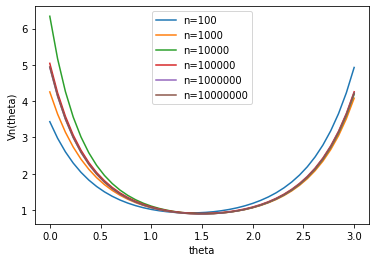

Question 8.a: Evaluation de tk
La procedure s'est arretee a k = 12 avec t0 = 5
La valeur obtenue = 1.4939340459177564


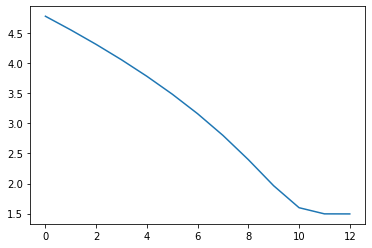

In [102]:
# Les fonctions pour caculer f(x) et Vn(x)
def f_1d(x, K):
    res = np.exp(x) - K
    res *= (res > 0)                  # On garde les valeurs > 0 et on met 0 pour le reste
    return res

def v_1d(x, theta, K):
    return (f_1d(x, K) ** 2 * np.exp(-theta * x + theta ** 2 / 2)).mean()

print("Question 8.a: les differentes representations de Vn.")

# Parametre
nmax = int(1e6)
K = 1
x = np.linspace(0, 3, 40)    # l'axe zero pour tracer le graphe

# Echantillonage pour n = 10e1 - 10e6
for n in [int(1e1), int(1e2), int(1e3), int(1e4), int(1e5), int(1e6)]:
    X = np.random.randn(n)
    v_de_theta = [v_1d(X, theta, K) for theta in x]
    plt.plot(x, v_de_theta, label="n={}".format(n))
plt.legend(loc="best")
plt.xlabel("theta")
plt.ylabel("Vn(theta)")
plt.show()

print("Question 8.a: Evaluation de tk")
# Les fonctions pour calculer grad et hess de la fonction V
def g_1d(X, t):
    return (f_1d(X, K) ** 2 * (t - X) * np.exp(-t * X + t ** 2 / 2)).mean()

def h_1d(X, t):
    return (f_1d(X, K) ** 2 * (1 + (t - X) ** 2) * np.exp(-t * X + t ** 2 / 2)).mean()

epsilon = 0.001
tks = []
t_initial = 5
tn = t_initial

# echantillon
X = np.random.randn(nmax)
# Condition initiale
gn = g_1d(X, tn)

while gn > epsilon and len(tks) < 101:
    tn = tn - gn / h_1d(X, tn)    # iteration
    gn = g_1d(X, tn)
    tks.append(tn)

if len(tks) < 101:
    print("La procedure s'est arretee a k = {} avec t0 = {}".format(len(tks) - 1, t_initial))
    print("La valeur obtenue = {}".format(tks[-1]))

print("\nLa convergence est lineaire : l'ecart est proportionnel au temps.")
plt.plot(tks)
plt.show()

$\newcommand{\eqdef}{:=}$
$\def\R{\mathbb{R}}$
$\def\P{\mathbb{P}}$
$\def\Q{\mathbb{Q}}$
$\def\mc{\mathcal}$
$\def\E{\mathbb{E}}$
$\def\Lth{L_\theta}$
$\def\Pth{\mathbb{P}_\theta}$
$\def\Eth{\mathbb{E}_\theta}$
$\def\Vth{\mathrm{Var}_\theta}$
$\newcommand{\pscal}[2]{\left\langle#1,#2\right\rangle}$

**8.b)** Tracer sur un même graphique les suites $\{M_n(0), n \geq 0\}$ et $\{M_n(\theta_n), n \geq 0\}$ pour $n$ variant de $100$ à $n_{\mathrm{max}}/10$ par sauts de $1000$ (de façon à accélérer l'algorithme). 

Pour comparaison, tracer aussi la droite horizontale $y=\E[f(X)]$ où cette constante est calculée avec la formule [(10)](#eq:BS).

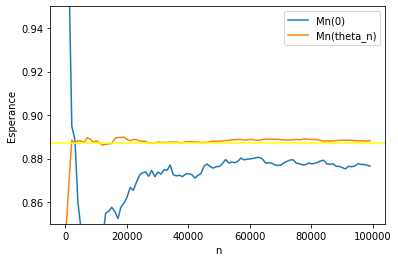

In [112]:
from tqdm.notebook import tqdm
# La valeur theorique caculee avec la formule (10)
def val_theorique(K):
    return np.exp(1/2) * stats.norm.cdf(1 - np.log(K)) - K * stats.norm.cdf(-np.log(K))

# La fonction qui permet de calculer Mn(theta)
def M_1d(X, theta):
    return ((f_1d(X + theta, K)) * np.exp(-theta * X - theta ** 2 / 2)).mean()


# Les listes qui stockes les valeurs obtenues.
Mn_0 = []
Mn_theta_n = []

nmax = int(1e6)
saut = 1000

# X: echantillonage
X = np.random.randn(nmax)

tn = 5
epsilon = 0.1

for n in range(100, int(nmax/10), saut):
    tn = 5
    gn = g_1d(X[:n], tn)
    count = 0
    while gn > epsilon and count < n:
        tn = tn - gn / h_1d(X[:n], tn)
        gn = g_1d(X[:n], tn)
        count += 1
    Mn_0.append(M_1d(X[:n], 0))
    Mn_theta_n.append(M_1d(X[:n], tn))

plt.plot([i for i in range(100, int(nmax/10), saut)], Mn_0, label="Mn(0)")
plt.plot([i for i in range(100, int(nmax/10), saut)], Mn_theta_n, label="Mn(theta_n)")
plt.axhline(val_theorique(1), color='yellow')
plt.legend(loc="best")
plt.xlabel("n")
plt.ylabel("Esperance")
plt.ylim(0.85, 0.95)
plt.show()

$\newcommand{\eqdef}{:=}$
$\def\R{\mathbb{R}}$
$\def\P{\mathbb{P}}$
$\def\Q{\mathbb{Q}}$
$\def\mc{\mathcal}$
$\def\E{\mathbb{E}}$
$\def\Lth{L_\theta}$
$\def\Pth{\mathbb{P}_\theta}$
$\def\Eth{\mathbb{E}_\theta}$
$\def\Vth{\mathrm{Var}_\theta}$
$\def\d{\mathrm{d}}$
$\newcommand{\pscal}[2]{\left\langle#1,#2\right\rangle}$

**8.c)** Pour différentes valeurs de $n$, simuler un grand nombre de réalisations de $M_n(0)$ et de $M_n(\theta_n)$, estimer les variances de ces deux v.a., et tracer l'histogramme de ces réalisations, ainsi que la droite verticale $x=\E[f(X)]$. Que nous disent ces histogrammes sur l'efficacité des deux méthodes ?

n = 100


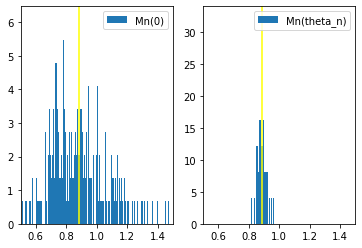

La variance de Mn_0 = 0.039031, celle de Mn(theta_n) = 0.001138)
n = 1000


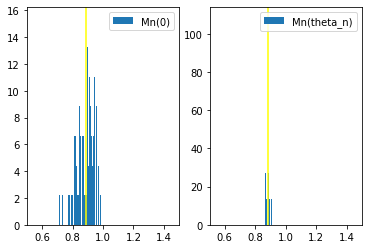

La variance de Mn_0 = 0.004050, celle de Mn(theta_n) = 0.000114)
n = 10000


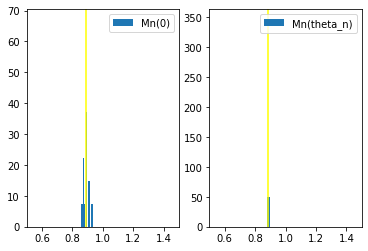

La variance de Mn_0 = 0.000407, celle de Mn(theta_n) = 0.000011)

La variance de methode Mn(theta_n) admet une variance plus petite: cela converge donc plus vite que l'autre.


In [147]:
M = 1000  # nb d'echantillon pour chaque n

tn = 5   # theta_0
epsilon = 0.1   # epsilon

for n in [int(1e2), int(1e3), int(1e4)]:
    print("n = {}".format(n))
    X = np.random.randn(M, n)
    Mn_0 = []
    Mn_theta_n = []
    for i in range(M):
        tn = 5
        gn = g_1d(X[i], tn)
        count = 0
        while gn > epsilon and count < n:
            tn = tn - gn / h_1d(X[i], tn)
            gn = g_1d(X[i], tn)
            count += 1
        Mn_0.append(M_1d(X[i], 0))
        Mn_theta_n.append(M_1d(X[i], tn))

    # plot
    plt.subplot(121)
    plt.hist(Mn_0, int(M ** 1/2 *2), density=True, label="Mn(0)")
    plt.axvline(val_theorique(1), color='yellow')
    plt.xlim(0.5, 1.5)
    plt.legend(loc="best")
    plt.subplot(122)
    plt.hist(Mn_theta_n, int(M ** 1/2 *2), density=True, label="Mn(theta_n)")
    plt.axvline(val_theorique(1), color='yellow')
    plt.xlim(0.5, 1.5)
    plt.legend(loc="best")
    plt.show()
    # Afficher les variances des deux methodes.
    print("La variance de Mn_0 = %8f, celle de Mn(theta_n) = %8f)" %(np.array(Mn_0).var(), np.array(Mn_theta_n).var()))
print("\nLa variance de methode Mn(theta_n) admet une variance plus petite: on a plus de precision avec l'agorithme adaptatif.")

***
#### Question 9.

Reprendre la question précédente en dimension $d$ supérieure, pour la fonction 
$$
    f: x =(x_1,\dots,x_d)\mapsto \left(\frac{1}{d}\sum_{i=1}^d e^{x_i}-K\right)^+,
$$ 
qui correspond au calcul du prix d'un call sur moyenne.  On affichera le tracé des suites $\{M_n(\theta_n), n \geq 0\}$ et $\{M_n(0), n \geq 0\}$ ainsi que les histogrammes.

Vous pourrez utiliser les fonctions d'algèbre linéaire `numpy.dot`, `numpy.inner`, `np.eye`, `np.outer`, aisi que `numpy.linalg.inv` et `numpy.linalg.norm`.

In [239]:
# X est de dimension 1 * d
def f_d(X, K):
    res = np.exp(X).mean(axis=-1) - K
    res *= res > 0
    return res

def g_d(X, theta):
    return np.mean([(f_d(X, 1) ** 2 * np.exp(-np.inner(theta, X)))[i] * (theta - X[i]) for i in range(n)], axis=0)* np.exp(np.inner(theta, theta) / 2)

def h_d(X, theta):
    return np.mean([(np.outer(theta - X[i], theta - X[i]) + np.eye(d)) * (f_d(X, 1) ** 2)[i] * np.exp(-np.inner(theta, X[i]) + np.inner(theta, theta) / 2)for i in range(n)], axis=0)

# La fonction qui permet de calculer Mn(theta)
def M_d(X, theta):
    return (f_d(X + theta, K) * np.exp(-np.inner(theta, X) - np.inner(theta, theta) / 2)).mean()

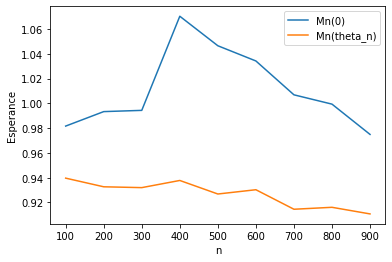

n = 100


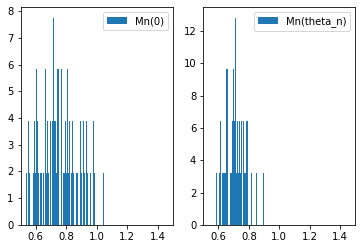

La variance de Mn_0 = 0.014334, celle de Mn(theta_n) = 0.004242)

La variance de methode Mn(theta_n) admet une variance plus petite: on a plus de precision avec l'agorithme adaptatif.


In [249]:
M = 100  # nb d'echantillon pour chaque n
d = 3

epsilon = 0.1   # epsilon

# Les listes qui stockes les valeurs obtenues.
Mn_0 = []
Mn_theta_n = []

nmax=1000
saut = 100

# X: echantillonage
X = np.random.randn(nmax, d)

for n in range(100, nmax, saut):
    tn = np.array([1] * d)
    gn = g_d(X, tn)
    count = 0
    while np.linalg.norm(gn) > epsilon and count < n:
        tn = tn - np.linalg.inv(h_d(X, tn)) @ gn
        gn = g_d(X, tn)
        count += 1
    Mn_0.append(M_1d(X[:n], 0))
    Mn_theta_n.append(M_1d(X[:n], tn))

plt.plot([i for i in range(100, nmax, saut)], Mn_0, label="Mn(0)")
plt.plot([i for i in range(100, nmax, saut)], Mn_theta_n, label="Mn(theta_n)")
plt.legend(loc="best")
plt.xlabel("n")
plt.ylabel("Esperance")
plt.show()

# Histogram
for n in [int(1e2)]:
    print("n = {}".format(n))
    X = np.random.randn(M, n, d)
    Mn_0 = []
    Mn_theta_n = []
    for i in range(M):
        tn = np.array([1] * d)
        gn = g_d(X[i], tn)
        count = 0
        while np.linalg.norm(gn) > epsilon and count < n:
            tn = tn - np.linalg.inv(h_d(X[i], tn)) @ gn
            gn = g_d(X[i], tn)
            count += 1
        Mn_0.append(M_d(X[i], [0] * d))
        Mn_theta_n.append(M_d(X[i], tn))

    # plot
    plt.subplot(121)
    plt.hist(Mn_0, int(M ** 1/2 *2), density=True, label="Mn(0)")
    plt.xlim(0.5, 1.5)
    plt.legend(loc="best")
    plt.subplot(122)
    plt.hist(Mn_theta_n, int(M ** 1/2 *2), density=True, label="Mn(theta_n)")
    plt.xlim(0.5, 1.5)
    plt.legend(loc="best")
    plt.show()
    # Afficher les variances des deux methodes.
    print("La variance de Mn_0 = %8f, celle de Mn(theta_n) = %8f)" %(np.array(Mn_0).var(), np.array(Mn_theta_n).var()))
print("\nLa variance de methode Mn(theta_n) admet une variance plus petite: on a plus de precision avec l'agorithme adaptatif.")